## Marvel Project

In [1]:
# Dependencies and Setup
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

# Read marvel data
marvel_data = pd.read_csv('db.csv',encoding = 'latin1')

marvel_data.head(100)

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,6,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,7,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,8,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,9,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,10,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [2]:
marvel_data["Budget_N"]=marvel_data["Budget"].astype(int)
print(marvel_data)

    Unnamed: 0                       Original Title Company  Rate  Metascore  \
0            1                             Iron Man  Marvel   7.9         79   
1            2                  The Incredible Hulk  Marvel   6.7         61   
2            3                           Iron Man 2  Marvel   7.0         57   
3            4                                 Thor  Marvel   7.0         57   
4            5   Captain America: The First Avenger  Marvel   6.9         66   
5            6                         The Avengers  Marvel   8.0         69   
6            7                       Iron Man Three  Marvel   7.2         62   
7            8                 Thor: The Dark World  Marvel   6.9         54   
8            9  Captain America: The Winter Soldier  Marvel   7.7         70   
9           10              Guardians of the Galaxy  Marvel   8.0         76   
10          11             Avengers: Age of Ultron   Marvel   7.3         66   
11          12                          

In [3]:
# Calculate the total budget

total_budget = marvel_data.groupby("Company")["Budget_N"].sum()
print(total_budget)



Company
DC        2746000000
Marvel    4434000000
Name: Budget_N, dtype: int64


In [4]:

total_revenue = marvel_data.groupby("Company")["Gross Worldwide"].sum()
print(total_revenue)

Company
DC         9690122336
Marvel    22585212034
Name: Gross Worldwide, dtype: int64


In [5]:
marvel_data["Profit"]= marvel_data["Gross Worldwide"] - marvel_data["Budget_N"]

print(marvel_data["Profit"])
total_profit = marvel_data.groupby("Company")["Profit"].sum()
print(total_profit)

0      445366247
1      113427551
2      423933331
3      299326618
4      230569774
5     1298812988
6     1014811252
7      474783140
8      544421503
9      602776600
10    1152805868
11     389311965
12     903296293
13     512718395
14     663756051
15     705166924
16     673977126
17    1146913161
18    1727359754
19     460674139
20     953274794
21    2441800564
22     971927996
23     -17897621
24     223413297
25     121081192
26     819934033
27      55258983
28     -36096688
29      19851172
30     831041287
31     443045518
32     623634919
33     571846894
34     672847012
35     357924295
36     988161807
37     264571656
38    1005504580
Name: Profit, dtype: int64
Company
DC         6944122336
Marvel    18151212034
Name: Profit, dtype: int64


<Axes: ylabel='Company'>

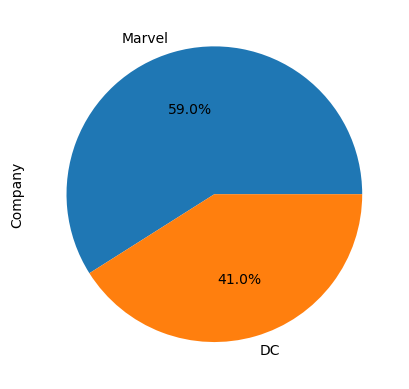

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = marvel_data.Company.value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")

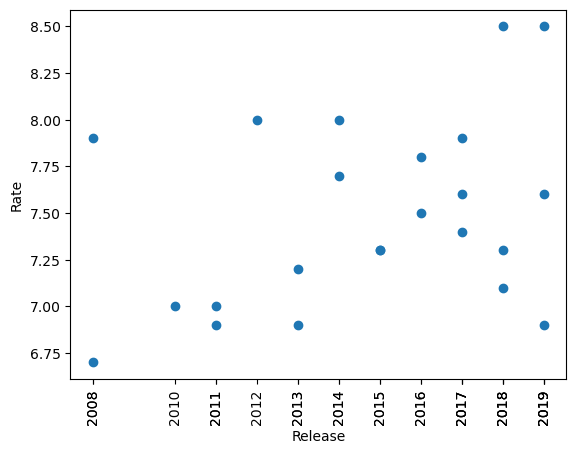

In [8]:
year = marvel_data.loc[(marvel_data["Company"]=="Marvel","Release")]
rate = marvel_data.loc[(marvel_data["Company"]=="Marvel","Rate")]
plt.scatter(year,rate)
plt.xticks(year, rotation=90)
plt.xlabel('Release')
plt.ylabel('Rate')
plt.show()

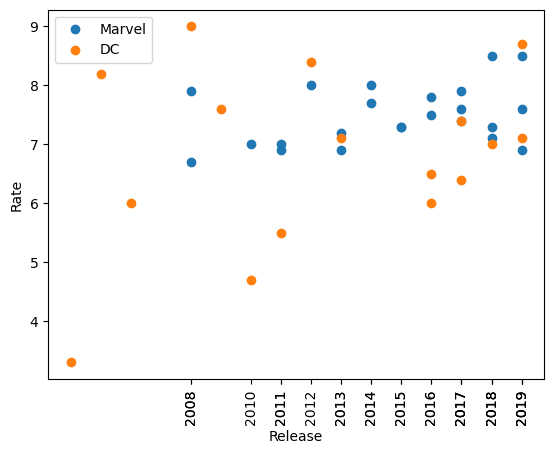

In [11]:
mv_year = marvel_data.loc[(marvel_data["Company"]=="Marvel","Release")]
mv_rate = marvel_data.loc[(marvel_data["Company"]=="Marvel","Rate")]
dc_year = marvel_data.loc[(marvel_data["Company"]=="DC","Release")]
dc_rate = marvel_data.loc[(marvel_data["Company"]=="DC","Rate")]
plt.scatter(mv_year,mv_rate)
plt.scatter(dc_year,dc_rate)
plt.xticks(year, rotation=90)
plt.xlabel('Release')
plt.ylabel('Rate')
plt.legend(['Marvel', 'DC'])
plt.show()